NOMBRES:

APELLIDOS:

CARNE:

FECHA:

## Reglas del comportamiento

1. La conversación **solo puede comenzar si el usuario saluda**.  
   Si no hay saludo inicial, Eliza debe responder:  
   > "Es importante iniciar una conversación con un saludo."

2. Una vez iniciado con un saludo:
   - Si el usuario menciona **el nombre del bot ("Eliza")**, debe responder:  
     > "Hola, ¿cómo estás?"
   - Si el usuario utiliza **un apodo ofensivo** (ej: "tonta"), debe responder:  
     > "No me trates así."
   - Si el mensaje coincide con **uno de los 5 patrones definidos**, responde de forma adecuada.
   - Si no coincide con nada anterior, responde con algo neutro como:  
     > "No puedo comprender tu comentario"

## Instrucciones

1. **Investiga la librería `re` de Python**  
   Aprende a usar expresiones regulares con `re.match()`, `re.search()`, y la bandera `re.IGNORECASE`.
2. **Debes de realizar un diagrama de flujo a mano de tu chatbot.**
3. **Define saludos válidos como expresiones regulares**  
   Tu bot debe reconocer como saludo:
   - "hola"
   - "qué tal"
   - "buenos días"
   - "buenas tardes"  
   - Agregar mas al gusto

4. **Implementa lógica para que el chatbot solo inicie si hay saludo**  
   Si no hay saludo, responde: `"Es importante iniciar una conversación con un saludo."`

5. **Haz que el bot no distinga entre mayúsculas y minúsculas**  
   Usa `re.IGNORECASE` en tus expresiones regulares.

6. **Crea al menos 5 patrones de conversación**  
   Usa expresiones como:
   - "Me siento (.*)"
   - "Estoy (.*)"
   - "Mi (.*)"
   - "(.*) trabajo (.*)"
   - "(.*)\?"

   Puedes crear tus propios patrones. Usa `random.choice()` para variar las respuestas.

6. **Reflexiona sobre errores ortográficos**  
   responde:
   - ¿El bot funciona con errores ortográficos?
   - ¿Qué soluciones posibles propones? *(No es necesario implementarlo)*.


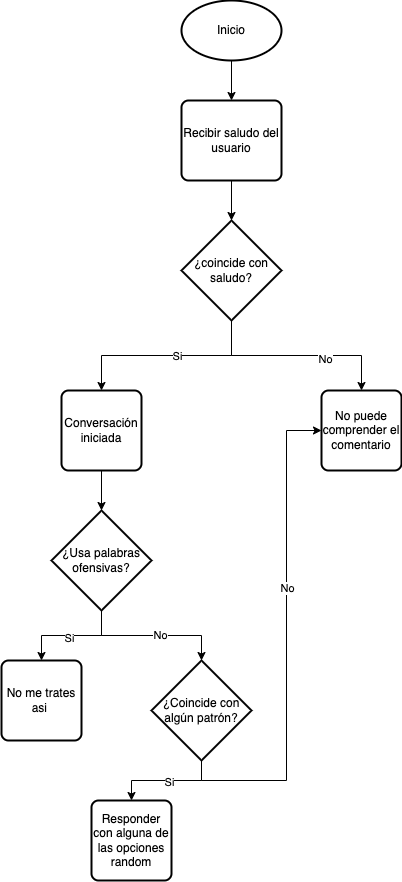

In [13]:
saludos = [
    r"^hola\b",
    r"^qué tal\b",
    r"^buenos días\b",
    r"^buenas tardes\b",
    r"^buenas noches\b",
    r"^wenass\b",
]


In [14]:
import random

patrones = {
    r"Me siento (.*)": [
        "Entiendo que te sientes {0}, ¿quieres contarme más?",
        "¿Y desde cuándo te sientes {0}?"
    ],
    r"Estoy (.*)": [
        "¿Qué te hace estar {0}?",
        "¿Cómo puedo ayudarte con que estés {0}?"
    ],
    r"Mi (.*)": [
        "Cuéntame más sobre tu {0}.",
        "¿Por qué mencionas tu {0}?"
    ],
    r"(.*) trabajo (.*)": [
        "El trabajo puede ser desafiante. ¿Qué sucede con tu trabajo?",
        "¿Te gustaría hablar más de eso relacionado con el trabajo?"
    ],
    r"(.*)\?": [
        "Buena pregunta. ¿Qué opinas tú?",
        "Interesante. ¿Qué crees que podría pasar?"
    ]
}


In [15]:
import re
saludo_regex = [re.compile(p, re.IGNORECASE) for p in saludos]
patrones_compilados = [(re.compile(p, re.IGNORECASE), respuestas)
                       for p, respuestas in patrones.items()]
ofensas = re.compile(r"\b(tonta|idiota|estúpida|puta|verga|imbecil)\b", re.IGNORECASE)

conversacion_iniciada = False

def responder(mensaje):
    global conversacion_iniciada

  
    if not conversacion_iniciada:
        for rx in saludo_regex:
            if rx.match(mensaje):
                conversacion_iniciada = True
                return random.choice(["¡Hola!", "¡Qué gusto saludarte!"])
        return "Es importante iniciar una conversación con un saludo."

    if re.search(r"\bEliza\b", mensaje, re.IGNORECASE):
        return "Hola, ¿cómo estás?"

    if ofensas.search(mensaje):
        return "No me trates así."

    for rx, respuestas in patrones_compilados:
        m = rx.match(mensaje)
        if m:
            contenido = m.group(1)
            return random.choice(respuestas).format(contenido.strip())

    return "No puedo comprender tu comentario"



In [18]:
while True:
    entrada = input("> ")
    print(responder(entrada))
    if entrada.lower() in ("adiós", "hasta luego", "adios"):
        break

No puedo comprender tu comentario
Hola, ¿cómo estás?
No puedo comprender tu comentario
¿Y desde cuándo te sientes ansiosa?
No puedo comprender tu comentario


## Reflexión
Al estar utilizando expresiones regulares, no se puede tener errores ortográficos ya que tiene que ser literal. Una posible solución a este problema es utilizar el fuzzy match para encontrar coincidencias. 